<a href="https://colab.research.google.com/github/saghar-trade/CLV-calculating-with-python/blob/main/CLV_calculating_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Year  Gross Profit  Retention Cost  Net Profit  Cumulative Retention  \
0     1           150              50         100              0.600000   
1     2           150              50         100              0.372000   
2     3           170              50         120              0.238080   
3     4           180              50         130              0.157133   
4     5           190              50         140              0.106850   
5     6           200              50         150              0.074795   
6     7           210              50         160              0.053853   
7     8           220              50         170              0.039851   
8     9           230              50         180              0.030287   
9    10           250              50         200              0.024229   

   Net Profit from Retained  Discount Factor  Discounted Net Profit  
0                 60.000000         0.909091              54.545455  
1                 37.200000       

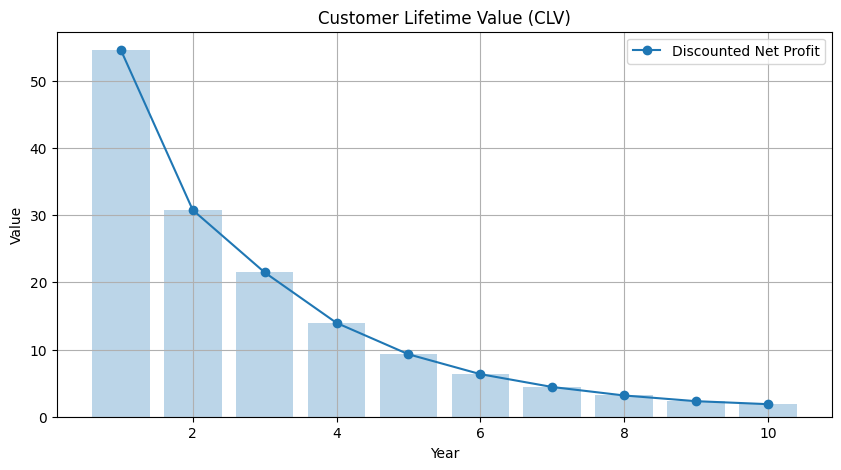

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# inputs
years = np.arange(1, 11)
gross_profit = [150, 150, 170, 180, 190, 200, 210, 220, 230, 250]
retention_cost = [50] * 10
retention_rate = [0.60, 0.62, 0.64, 0.66, 0.68, 0.70, 0.72, 0.74, 0.76, 0.80]
discount_rate = 0.10

# computing section
df = pd.DataFrame({
    "Year": years,
    "Gross Profit": gross_profit,
    "Retention Cost": retention_cost
})

df["Net Profit"] = df["Gross Profit"] - df["Retention Cost"]

df["Cumulative Retention"] = np.cumprod(retention_rate)


df["Net Profit from Retained"] = df["Net Profit"] * df["Cumulative Retention"]


df["Discount Factor"] = 1 / (1 + discount_rate) ** df["Year"]

df["Discounted Net Profit"] = df["Net Profit from Retained"] * df["Discount Factor"]

# CLV
total_clv = df["Discounted Net Profit"].sum()

#output
print(df)
print(f"\nTotal CLV = {total_clv:.2f}")

# visualization
plt.figure(figsize=(10, 5))
plt.plot(df["Year"], df["Discounted Net Profit"], marker="o", label="Discounted Net Profit")
plt.bar(df["Year"], df["Discounted Net Profit"], alpha=0.3)
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Customer Lifetime Value (CLV)")
plt.legend()
plt.grid(True)
plt.show()
